<a href="https://colab.research.google.com/github/aslam7861/Python/blob/main/eniac_common_group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Head

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)


# Apple prodcuts only

1) Categories-> App product, or with other beuatiful name....
2)

* Clean the data(Pipeline)
* Delete the data which are not complete probably....
* is Revenue increasign with discounts??


* Finding the black friday or some special day wherer the discounts are given a lot???
* price - unit price to find discounts


In [5]:
# explore
print(orderlines.info())
print(orderlines.sample(3))
print(orders.info())
print(orders.sample(3))
print(brands.info())
print(brands.sample(3))
print(products.info())
print(products.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293743 entries, 0 to 293742
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                293743 non-null  int64  
 1   id_order          293743 non-null  int64  
 2   product_id        293743 non-null  int64  
 3   product_quantity  293743 non-null  int64  
 4   sku               293743 non-null  object 
 5   unit_price        293743 non-null  float64
 6   date              293743 non-null  object 
 7   total_price       293743 non-null  float64
 8   check_orders      293743 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 18.2+ MB
None
             id  id_order  product_id  product_quantity      sku  unit_price  \
192215  1482794    457524           0                 1  NEA0020       76.00   
241682  1567694    491691           0                 1  APP2660    14580.00   
203424  1498922    463982           0        

# Final Code

In [6]:
# clean the dataframes
orderlines = (
 orderlines
     .assign(date = lambda df_: pd.to_datetime(df_['date']))
     .drop(['product_id', 'check_orders'], axis=1)
     )

orders = (
 orders
     .assign(created_date = lambda df_: pd.to_datetime(df_['created_date']))
     .rename(columns={'created_date':'date','order_id' :'id_order' })
     .drop('check_orders', axis=1)
     )

#products = (
# products
#     .drop(['type'], axis=1)
#     )

# %% merge orders and orderlines and calculate the discount
df = (
orderlines
    .merge(orders, how="left", on='id_order')
    .drop('date_y', axis=1)
    .rename(columns={'date_x':'date'})
    .query('state == "Completed"')
    .reset_index(drop=True)
    .merge(products, how='left') 
    .assign(price = lambda df_: np.where(np.isnan(df_['price']),
                                         df_['max_price_orderlines'], df_['price']))
    .assign(discount = lambda df_: df_['price'] - df_['unit_price'],
            discount_perc = lambda df_: round((df_['discount'] * 100) / df_['price'])
            ))

In [7]:
df.shape

(62103, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62103 entries, 0 to 62102
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    62103 non-null  int64         
 1   id_order              62103 non-null  int64         
 2   product_quantity      62103 non-null  int64         
 3   sku                   62103 non-null  object        
 4   unit_price            62103 non-null  float64       
 5   date                  62103 non-null  datetime64[ns]
 6   total_price           62103 non-null  float64       
 7   total_paid            62103 non-null  float64       
 8   state                 62103 non-null  object        
 9   name                  61742 non-null  object        
 10  desc                  61738 non-null  object        
 11  price                 61742 non-null  float64       
 12  type                  61729 non-null  object        
 13  max_price_orderl

In [9]:
print(df.sample(3))

            id  id_order  product_quantity      sku  unit_price  \
14288  1255375    359325                 1  AP20147      129.00   
16854  1278197    370554                 1  WHO0008       15.90   
18808  1290267    376203                 1  ELA0026       12.99   

                     date  total_price  total_paid      state  \
14288 2017-05-26 10:19:35       129.00      473.48  Completed   
16854 2017-06-30 08:18:25        15.90       29.88  Completed   
18808 2017-07-12 09:07:12        12.99       90.94  Completed   

                                                   name  \
14288             Like new - Apple TV 32GB media player   
16854               Whoosh DUO + ​​Cleanser 100ml + 8ml   
18808  Elago Airpod Charging stand Charging Stand White   

                                                    desc  price      type  \
14288                Refurbished Apple multimedia player 179.00      4259   
16854                    Sprays cleaners Pack 2 screens.  19.99  12085400   
18

# Kind of Plotting

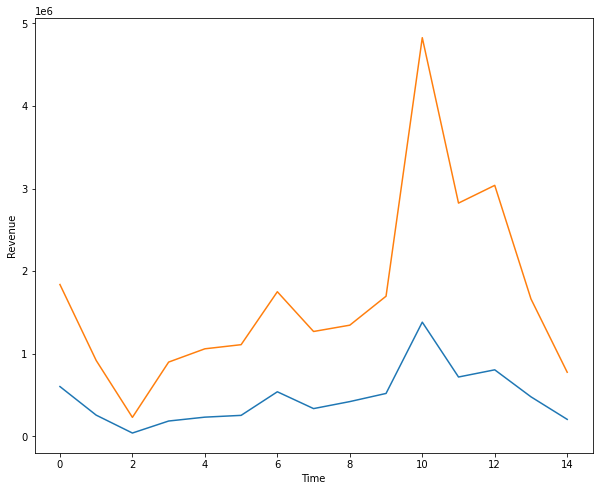

In [10]:
# add some plot categories (by Sebastian)

# shorter version like this:
discoplot = (df
  .assign(year = df['date'].dt.strftime('%y-%m'), month = df['date'].dt.strftime('%m')) # create year and month
  .groupby(['year', 'month']).agg({'discount': 'sum', 'total_paid': 'sum', 'discount_perc':'mean'})
  .sort_values(by=['year', 'month'], ascending=True).reset_index()
)
discoplot['discount'] = discoplot['discount']*3 # boost discount line
# print(discoplot)

# plot by seaborn


plt.subplots(figsize=(10, 8))
# sns.barplot(data=discoplot, x='year', y='total_paid', hue ='year')
x_values = range(len(discoplot['month']))
plt.plot(x_values, discoplot['discount'])
plt.plot(x_values, discoplot['total_paid'])
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.show()

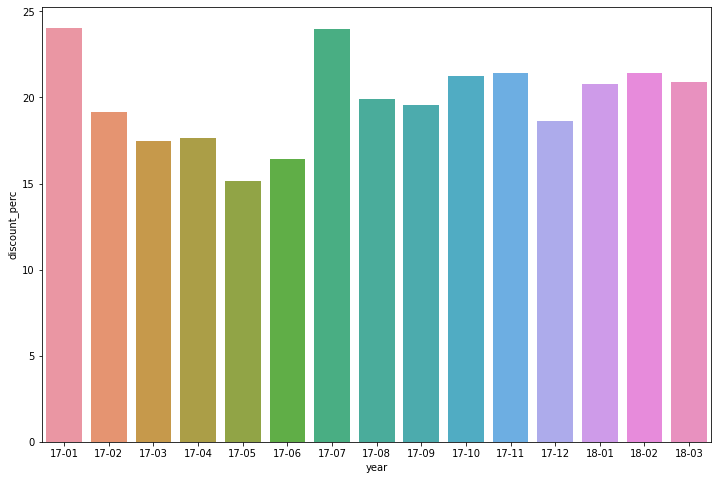

In [11]:
plt.subplots(figsize=(12,8))
sns.barplot(data=discoplot, x= 'year', y='discount_perc')

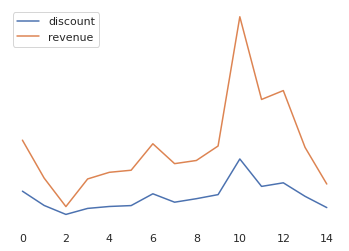

In [12]:
# add some plot categories (by Sebastian)

# shorter version like this:
discoplot = (df
  .assign(year = df['date'].dt.strftime('%Y'), month = df['date'].dt.strftime('%m')) # create year and month
  .groupby(['year', 'month']).agg({'discount': 'sum', 'total_paid': sum})
  .sort_values(by=['year', 'month'], ascending=True).reset_index()
)
discoplot['discount'] = discoplot['discount']*3 # boost discount line
# print(discoplot)

"""
# plot it
x_values = range(len(discoplot['month']))
plt.plot(x_values, discoplot['discount'])
plt.plot(x_values, discoplot['total_paid'])
ax = plt.subplot(); ax.set_xticks(x_values); ax.set_xticklabels(discoplot['month'])
plt.show()
"""

# plot by seaborn
sns.set_theme()
sns.set_style('white')
x_values = range(len(discoplot['month']))
ax = sns.lineplot(x=x_values, y="discount", data=discoplot)
ax.set(xlabel=None, ylabel=None)
ax.set_yticks([])
plt.plot(x_values, discoplot['total_paid'])
plt.legend(['discount', 'revenue'], loc=2)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

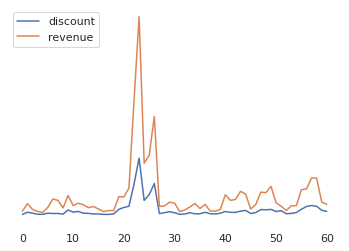

In [13]:
# zoom in for christmas

discoplot_nov_dec = (df
  .assign(year = df['date'].dt.strftime('%Y'), month = df['date'].dt.strftime('%m'), day = df['date'].dt.strftime('%d')) # create year and month
  .groupby(['year', 'month', 'day']).agg({'discount': 'sum', 'total_paid': sum})
  .sort_values(by=['year', 'month', 'day'], ascending=True).reset_index()
  .query('month == "11" | month == "12"')
)
discoplot_nov_dec['discount'] = discoplot_nov_dec['discount']*3 # boost discount line
# print(discoplot_nov_dec)

# plot by seaborn
sns.set_theme()
sns.set_style('white')
x_values = range(len(discoplot_nov_dec['day']))
ax = sns.lineplot(x=x_values, y="discount", data=discoplot_nov_dec)
ax.set(xlabel=None, ylabel=None)
ax.set_yticks([])
plt.plot(x_values, discoplot_nov_dec['total_paid'])
plt.legend(['discount', 'revenue'], loc=2)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

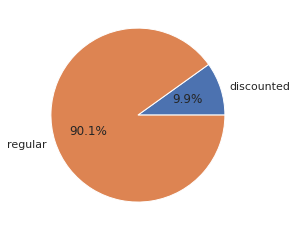

In [14]:
# How many products are being discounted?
# sum where discount.sum == 0
# sum where discount.sum != 0
disco_ = (df
  .query('discount == 0')
  .groupby(['sku']).agg({'sku': 'count'})
)
disco_yes=len(disco_.index)

disco_ = (df
  .query('discount != 0')
  .groupby(['sku']).agg({'sku': 'count'})
)
disco_no=len(disco_.index)

# plot it
x_values = [disco_yes, disco_no]
labeling = ['discounted', 'regular']

plt.pie(x_values, labels=labeling, autopct='%0.1f%%')
plt.show()

# Creating product categories

In [15]:
import re

In [16]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [17]:
categories = ['Mac', 'iPhone', 'Accessories', 'iPad', 'Watch', 'Storage', 'Services']

In [18]:
products = products[products['sku'].isin(df['sku'])]

In [19]:
# adding a category column filled with nan
products['category'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# defining regex for iPhone, Mac, and iPad categories
iphone_regex = re.compile(r"apple iphone.*gb", flags=re.I)
mac_regex = re.compile(r"apple i?mac.*gb", flags=re.I)
ipad_regex = re.compile(r"apple ipad.*gb", flags=re.I)

In [21]:
# from collections import Counter
# Counter(" ".join(products[products.name.str.contains(re.compile(r"^apple i?mac", flags=re.IGNORECASE))].name).split()).most_common(10)

In [22]:
# Creating lists of category_regex and category_names to use in the for loop to\ 
# fill the category column
category_regex = [iphone_regex, mac_regex, ipad_regex]
category_names = ['iPhone', 'Mac', 'iPad']

In [23]:
# filling in the category column with iPhone, Mac, and iPad category names
for x, y in zip(category_regex, category_names):
  products.loc[products['name'].str.contains(x, regex=True), 'category'] = y

In [24]:
# defining regex for Watch category
watch_regex = re.compile(r"apple watch", flags=re.I)

In [25]:
# filling in the category column with Watch category name using watch_regex and\
# a list of Watch type numbers found from exploring the name column
(products
    .loc[products['name'].str.contains(watch_regex, regex=True) & 
         products['type'].isin(['24885185' , '24895185']), 
         'category'] 
) = "Watch"

In [26]:
# defining lists of type numbers belonging to other categories found from exploring\
# the name column of the observations that so far has nan in their category column
accessories_types = ['11865403', '11905404', '12635403', '13835403', '12585395',\
                    '1296', '5384', '1325', '5398', '1334', '1229', '12995397'\
                    '13615399', '1404', '8696', '13855401', '1387', '1230',\
                    '1325', '1334', '13005399','12995397', '13955395','1276',\
                    '12635403','12355400','1404','101781405','12085400', '9094',\
                    '14305406','10142', '12645406','10230','14365395','5395',\
                    '13555403','21485407','12575403','14035403','1216','1515',\
                    '1392','5,49E+11','5398','1296','1375','5405','12285400',\
                    '5720','15435404','24215399','11434','2425','2434','2449',\
                    '54864259','5403','21535407', '5407','5406','5404','54025401',\
                    '5401','5399','11859']
storage_types = ['11935397', '12175397', '1364', '12215397', '1433', '57445397',\
                '12655397','12755395', '11935397', '1424','57445397','1280',\
                '11821715','42945397','4259','54085407','79201715','113464259']
service_types = ['1,44E+11','20642062','1,46E+11','1231','1416']
iphone_types = ['51601716','24821716','1716']
mac_types = ['1282']
watch_types = ['24895185']
open_products_types = ['1298']


#  How many products are discounted?

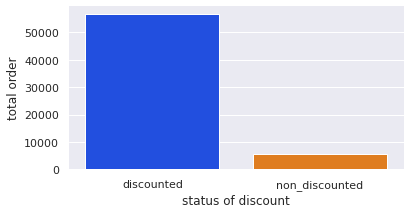

In [77]:
df['discounts'] = df['discount_perc'].map(lambda x: 'discounted' if x>0 else 'non_discounted')
disc_order=df.groupby('discounts').agg(total_order=('id_order','count')).reset_index()
plt.subplots(figsize=(6, 3))
tt=sns.barplot(data= disc_order, x='discounts', y='total_order')
plt.xlabel('status of discount')
plt.ylabel('total order')
sns.despine(top=True, right=True, left=True, bottom=True)

In [78]:
disc_order

,discounts,total_order
0,discounted,56616
1,non_discounted,5487


# products should be classified into different categories

In [28]:
# defining lists of category types and category names to use in the for loop to\ 
# replace the rest of the nan in the category column
category_types = [accessories_types, storage_types, service_types, iphone_types, mac_types, watch_types,\
                  open_products_types]
category_names = ['Accessories', 'Storage', 'Service', 'iPhone', 'Mac', 'Watch']

In [29]:
for x, y in zip(category_types, category_names):
  products.loc[products['type'].isin(x), 'category'] = y

In [30]:
# using merge to add the category column in the final df
df = pd.merge(df,products[['sku','category']],on='sku', how='left')
df.head(3)

,id,id_order,product_quantity,sku,unit_price,date,total_price,total_paid,state,name,desc,price,type,max_price_orderlines,discount,discount_perc,discounts,category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,12755395,NaN,13.50,22.00,discounted,Storage
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s / 5c / 4S,22.95,5720,NaN,3.96,17.00,discounted,Accessories
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,72.19,Completed,"Apple 85W MagSafe 2 charger MacBook Pro screen Retina 15 ""(OEM)",Apple MagSafe 2 Charger for MacBook Pro 15-inch Retina 85W unboxed,89.00,13005399,NaN,16.81,19.00,discounted,Accessories


In [31]:
df.shape

(62103, 18)

In [32]:
cat_perc=df.groupby('category', ).agg({'discount_perc':'mean'}).sort_values('discount_perc').reset_index()

In [33]:
cat_perc['discount_perc'].sum()

94.41081191327147

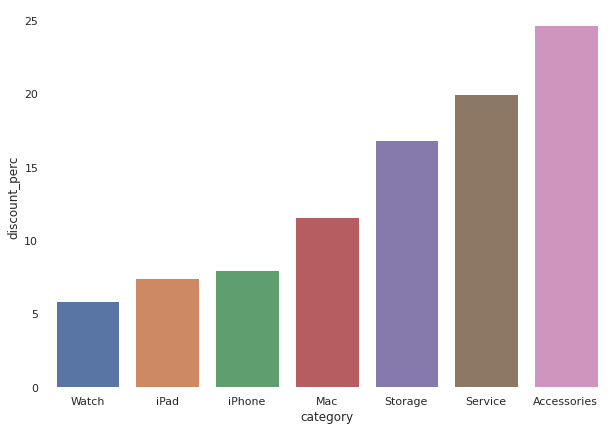

In [34]:
plt.subplots(figsize=(10, 7))
sns.barplot(data=cat_perc, x='category', y='discount_perc')
sns.despine(top=True, right=True, left=True, bottom=True)

In [35]:
[a for a in cat_perc['category']]

['Watch', 'iPad', 'iPhone', 'Mac', 'Storage', 'Service', 'Accessories']

In [36]:
[round(a,1) for a in cat_perc['discount_perc']]

[5.9, 7.4, 8.0, 11.6, 16.9, 20.0, 24.7]

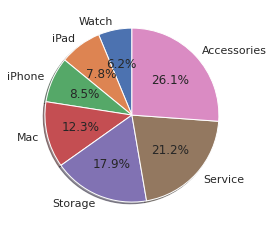

In [37]:
labels = 'Watch', 'iPad', 'iPhone', 'Mac', 'Storage', 'Service', 'Accessories'
sizes = [5.9, 7.4, 8.0, 11.6, 16.9, 20.0, 24.7]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

g1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Some plots regarding categories

In [38]:
df.shape

(62103, 18)

In [39]:
df.head(3)

,id,id_order,product_quantity,sku,unit_price,date,total_price,total_paid,state,name,desc,price,type,max_price_orderlines,discount,discount_perc,discounts,category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,12755395,NaN,13.50,22.00,discounted,Storage
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s / 5c / 4S,22.95,5720,NaN,3.96,17.00,discounted,Accessories
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,72.19,Completed,"Apple 85W MagSafe 2 charger MacBook Pro screen Retina 15 ""(OEM)",Apple MagSafe 2 Charger for MacBook Pro 15-inch Retina 85W unboxed,89.00,13005399,NaN,16.81,19.00,discounted,Accessories


In [40]:
df_perc_only = df.query('discount_perc >0')


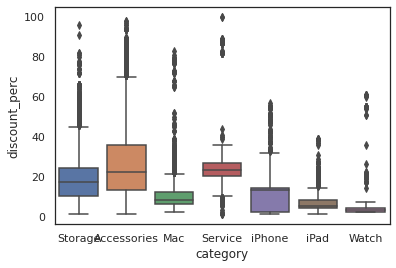

In [41]:
sns.boxplot(data=df_perc_only, x= 'category', y='discount_perc')

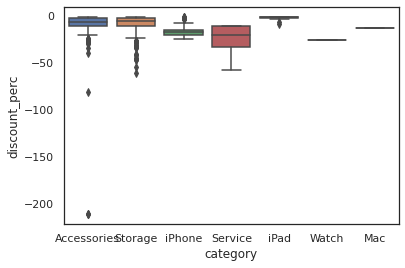

In [42]:
df_perc_neg = df.query('discount_perc <0')
df_perc_neg.shape
sns.boxplot(data=df_perc_neg, x= 'category', y='discount_perc')

In [43]:
#sns.boxplot(data=df_wit_perc_only, x='category', y='discount_perc');

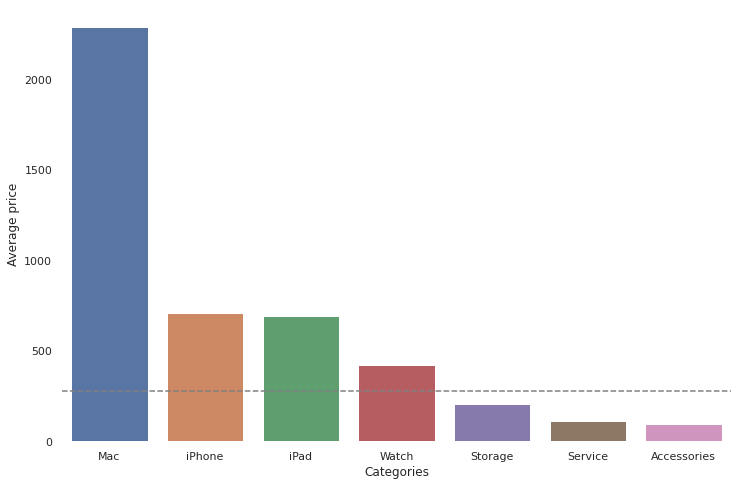

In [44]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.barplot(data=q2, x='category', y='price', ci='sd')
tt.axhline(
    df['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')
sns.despine(top=True, right=True, left=True, bottom=True)

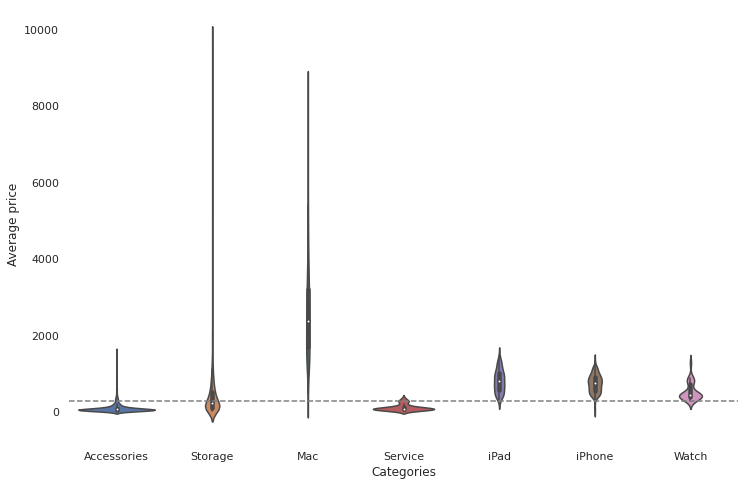

In [45]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.violinplot(data=products, x='category', y='price', ci='sd')
tt.axhline(
    df['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')
sns.despine(top=True, right=True, left=True, bottom=True)

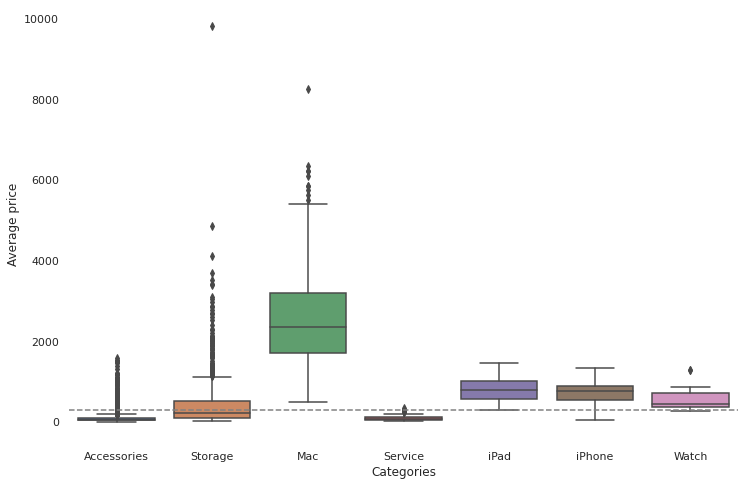

In [46]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.boxplot(data=products, x='category', y='price')
tt.axhline(
    df['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')
sns.despine(top=True, right=True, left=True, bottom=True)

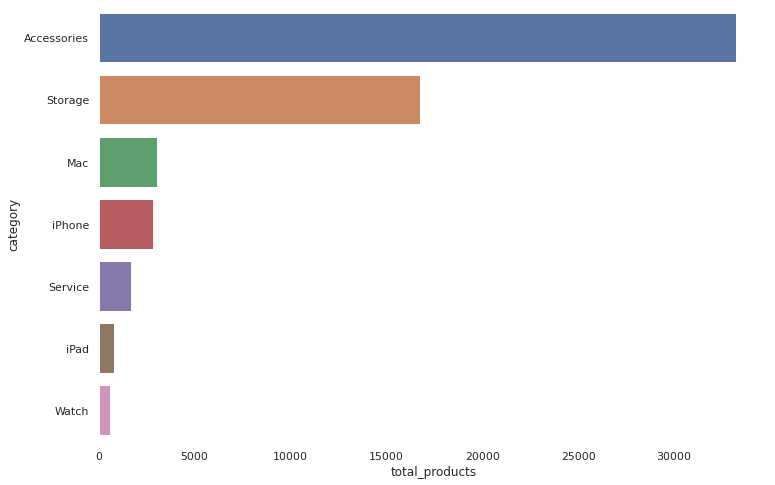

In [47]:
dd=df.groupby('category').agg(total_products=('category','count') ).sort_values('total_products', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
sns.barplot(data=dd, y='category', x='total_products')
sns.despine(top=True, right=True, left=True, bottom=True)

# Experiments

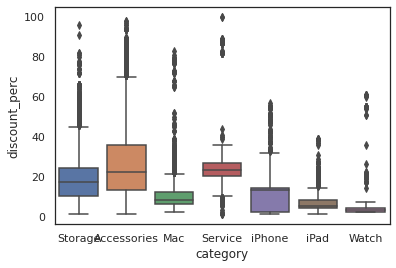

In [48]:
df_perc_only = df.query('discount_perc > 0')
# print(df_wit_perc)
sns.boxplot(data=df_perc_only, x='category', y='discount_perc');
# add range here? between 0 and 100

Text(0, 0.5, 'Average price')

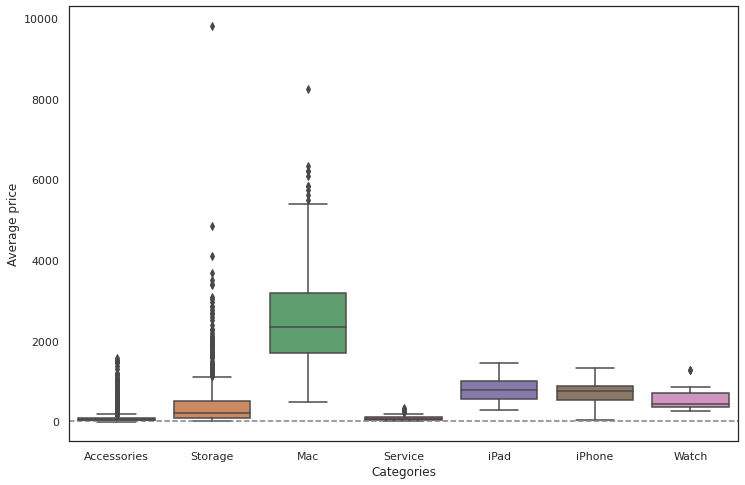

In [49]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.boxplot(data=products, x='category', y='price')
tt.axhline(
    df['discount_perc'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


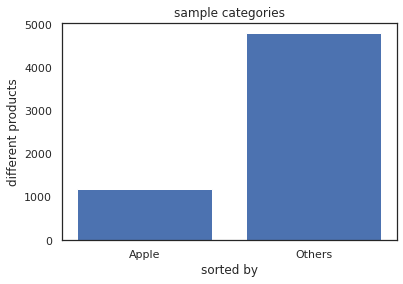

In [50]:
# Sebastian says

# sum of products - apple/non-apple
products['short_sku'] = products['sku'].str[0:3]
products['cat'] = ['Apple' if (x == 'APP' or x == 'AP2') else 'Others' for x in products['short_sku']] # this is the filter
pro_by_cat = (products[['cat', 'short_sku']]
  .groupby('cat').count()
  .reset_index()
)
# print(pro_by_cat)

# plot it
plt.bar(range(len(pro_by_cat['cat'])), pro_by_cat['short_sku'])
plt.title('sample categories')
plt.xlabel('sorted by')
plt.ylabel('different products')
ax = plt.subplot()
ax.set_xticks(range(len(pro_by_cat['cat'])))
ax.set_xticklabels(pro_by_cat['cat'])
plt.show()

# find prize categories


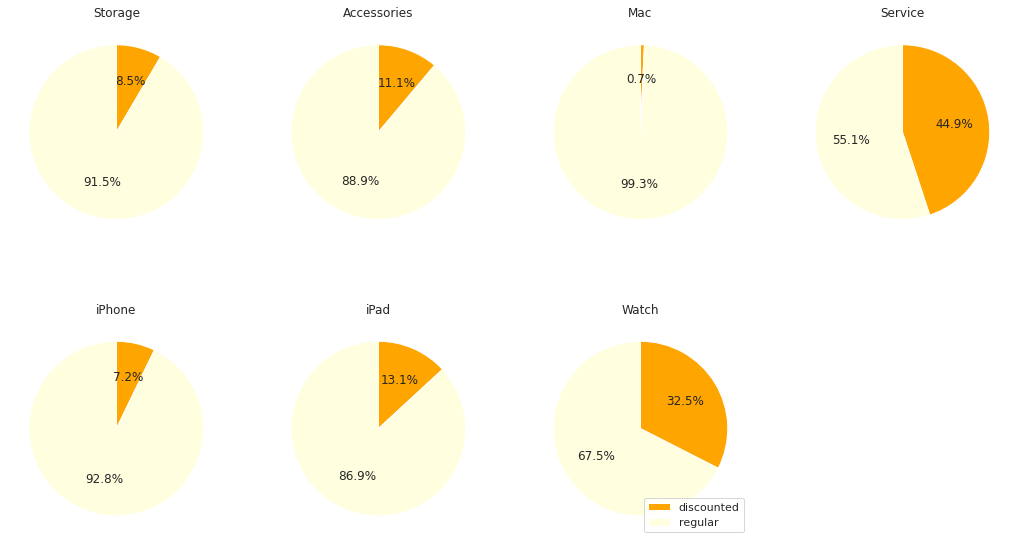

In [51]:
# How many products are being discounted? by category
# sum where discount.sum == 0
# sum where discount.sum != 0

cat_list_dirty = df['category'].unique()
cat_list = [x for x in cat_list_dirty if x == x] # remove nan from list
# print(cat_list)

plt.subplots(figsize=(18, 10))
index_of_subplot = 0

for cat_ in cat_list:
  index_of_subplot += 1

#  print(index_of_subplot%4)
#  print(cat_)

  disco_ = (df
    .query('discount == 0')
    .query('category == @cat_')
    .groupby(['sku']).agg({'sku': 'count'})
  )
  disco_yes=len(disco_.index)

  disco_ = (df
    .query('discount != 0')
    .query('category == @cat_')
    .groupby(['sku']).agg({'sku': 'count'})
  )
  disco_no=len(disco_.index)

  # def subplot
  x_values = [disco_yes, disco_no]
  labeling = ['discounted', 'regular']
  plt.subplot(2, len(df['category'].unique())/2, index_of_subplot)
  plt.title(cat_)
  plt.pie(x_values, autopct='%0.1f%%', startangle=90, counterclock=False, colors=['orange', 'lightyellow']) # labels=labeling,

# plot it all
plt.legend(['discounted', 'regular'], loc=4)
plt.show()

In [52]:
# Nabil says

products[products.name.str.startswith('Apple iPad')].head(2)

,sku,name,desc,price,type,max_price_orderlines,category,short_sku,cat
1190,APP0869,Apple iPad 2 Wi-Fi Air 128GB Space Gray,New iPad Air 2 Wi-Fi 128GB (MGTX2TY / A).,NaN,42931714,539.00,iPad,APP,Apple
1192,APP0870,Apple iPad 2 Wi-Fi Air 128GB Silver,New iPad Air 2 Wi-Fi 128GB (MGTY2TY / A).,NaN,42931714,539.00,iPad,APP,Apple


In [53]:
# Aslam says
def cat_fun(x):
  if pd.Series(x).str.lower().str.contains('apple').sum() > 0:
    return 'app_prod'
  elif pd.Series(x).str.lower().str.contains('hard drive|ssd|memory').sum() > 0:
  #products['name'].str.lower().str.contains('hard drive|ssd')==True:
    return 'hard_drive'
  elif pd.Series(x).str.lower().str.contains('case').sum() > 0:
  #products['name'].str.lower().str.contains('case')==True:
    return 'cover_case'
  elif pd.Series(x).str.lower().str.contains('backpack|aluminum').sum() > 0:
    return 'backpack'
  elif pd.Series(x).str.lower().str.contains('repair').sum() > 0:
    return 'refurbished'
  elif pd.Series(x).str.lower().str.contains('gb ram').sum() > 0:
    return 'ram'    
  else:
    return 'others'
pp=products.assign(category= products['name'].map(lambda x: cat_fun(x)))

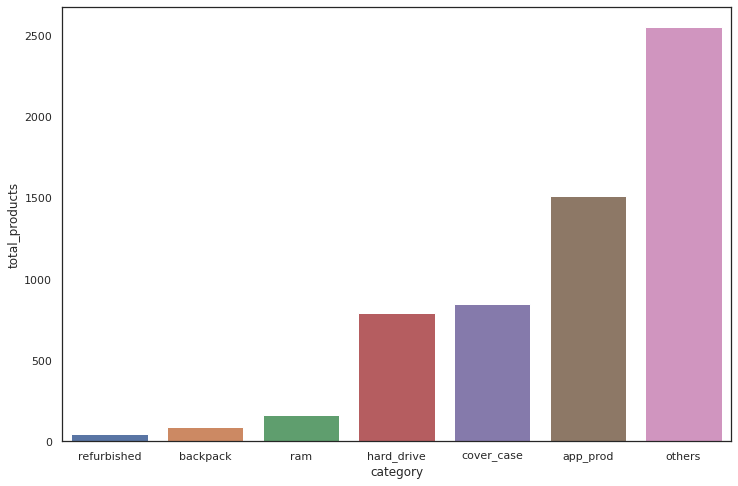

In [54]:
#Aslam
#need to reduce others category
plt.subplots(figsize=(12, 8))
q1=pp.groupby('category').agg(total_products=('category','count') ).sort_values('total_products').reset_index()
sns.barplot(data=q1, x='category', y='total_products')

Text(0, 0.5, 'Average price')

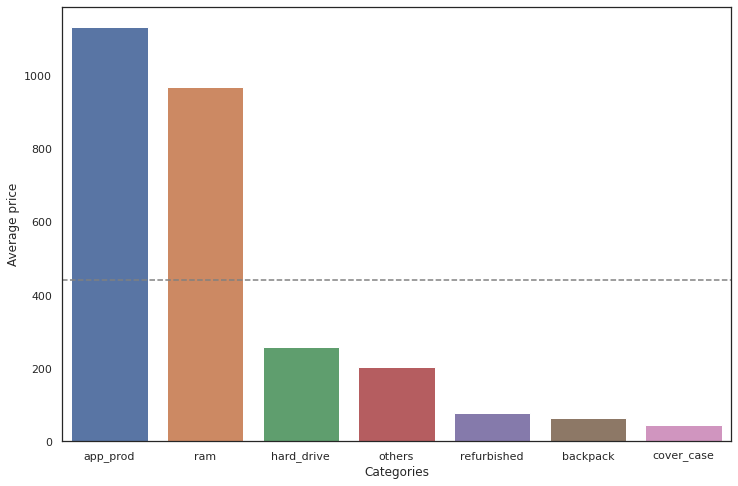

In [55]:
q2 = pp.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
fig=sns.barplot(data=q2, x='category', y='price', ci='sd')
fig.axhline(
    products['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')


In [56]:
# from collections import Counter
# Counter(" ".join(products[products.name.str.contains(re.compile(r"^apple i?mac", flags=re.IGNORECASE))].name).split()).most_common(10)

# 1.   Settle the ongoing debate: whether or not it’s beneficial to discount products.

*   The Marketing Team Lead: 

> Offering discounts is beneficial in the long run - discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.

*   The main investors in the Board:

> Prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market - the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue.

A critical question, hence, is whether revenue grows whenever discounts increase.

In [57]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [58]:
df_discounts = \
(df
    .sort_values('date')
    .assign(year = df['date'].dt.strftime('%Y'),
            month = pd.Categorical(df.date.dt.strftime('%b'), categories=months, ordered=True))
            # month = pd.Categorical(df['date'].dt.strftime('%b'))
    .groupby(['year','month'])
    .agg(total_product_quantity = ('product_quantity', sum), total_discount = ('discount', sum),\
                                    revenue = ('total_price', sum))
    .sort_values(['year','month'])
    .replace(0, np.nan)
    .reset_index()
)

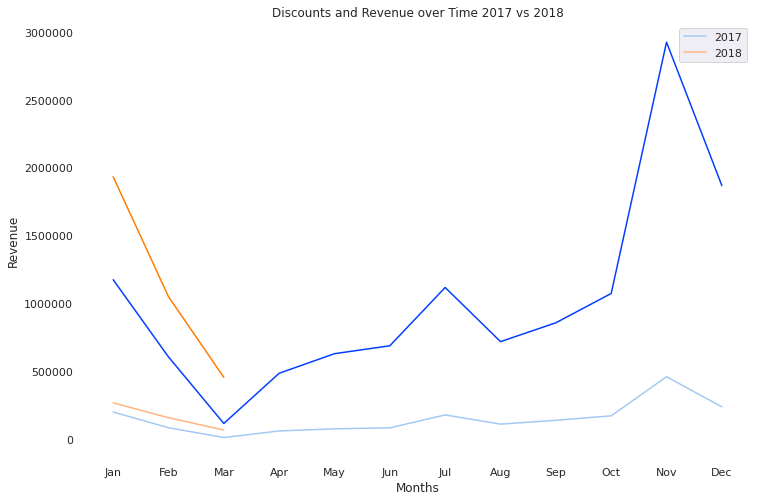

In [59]:
# define the size of the plot
# using matplotlib (plt), which operates together with seaborn

plt.subplots(figsize=(12, 8))

sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, and ticks.
sns.set_palette("pastel") # deep, muted, pastel, bright, dark, and colorblind

# p = sns.barplot(data=df,
#                 x='',
#                 y='',
#                 hue='',
#                 order=[],
#                 ci="sd"
#                 estimator=) # np.median for median and len to calculate the number of times a particular value appears in the y column


total_discount_p = (sns.lineplot(data=df_discounts,
                 x='month',
                 y='total_discount',
                  hue='year', ))

revenue_p = (sns.lineplot(data=df_discounts,
                 x='month',
                 y='revenue',
                 hue='year', palette="bright"))
# sns.set_style("") # darkgrid, whitegrid, dark, white, and ticks.

# add a horizontal reference line into the chart to know where the mean value will be
# p.axhline(
#     df['y'].mean(), # value where you want to add your reference line
#     linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
#     color='gray')

# plt.xlim('Oct','Dec') # define a limit to put focus on your chart
# plt.ylim('Oct','Dec') # define a limit to put focus on your chart

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Discounts and Revenue over Time 2017 vs 2018')

plt.legend(labels=['2017', '2018'])

plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# sns.despine() # remove the top and right margin, to make your plot prettier
sns.despine(top=True, right=True, left=True, bottom=True)

# sns.set_style("") # darkgrid, whitegrid, dark, white, and ticks.

plt.show()

The plot supports the idea that offering discounts is beneficial in the long run

In [60]:
df_discounts2 = (df
    .assign(year_month = df['date'].dt.strftime('%Y-%m'))
    .groupby('year_month')
    .agg(total_discount = ('discount', sum), revenue = ('total_price', sum))
    .sort_values(['year_month'])
    .replace(0, np.nan)
    .reset_index()
)


In [61]:
df_discounts2.head()

,year_month,total_discount,revenue
0,2017-01,200995.92,1175631.77
1,2017-02,85675.35,607088.37
2,2017-03,13401.45,117009.39
3,2017-04,61884.04,486537.69
4,2017-05,77509.69,630672.23


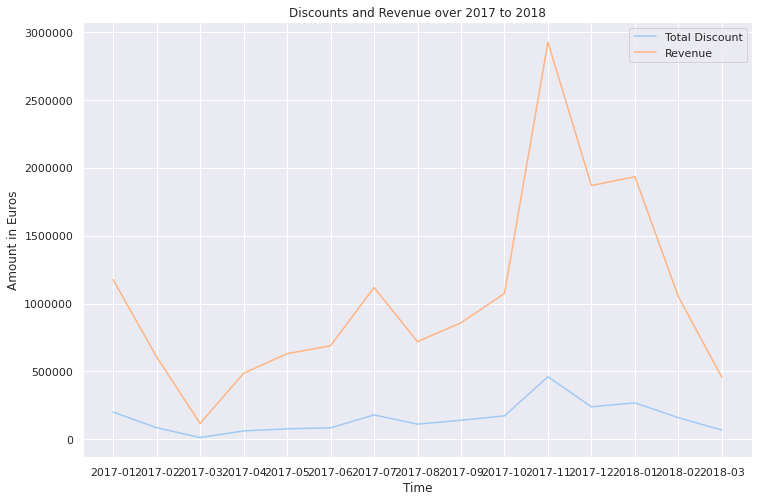

In [62]:
# define the size of the plot
# using matplotlib (plt), which operates together with seaborn

ax = plt.subplots(figsize=(12, 8))

sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, and ticks.
sns.set_palette("pastel") # deep, muted, pastel, bright, dark, and colorblind

# p = sns.barplot(data=df,
#                 x='',
#                 y='',
#                 hue='',
#                 order=[],
#                 ci="sd"
#                 estimator=) # np.median for median and len to calculate the number of times a particular value appears in the y column


sns.lineplot(data=df_discounts2, x='year_month',y='total_discount')
sns.lineplot(data=df_discounts2, x='year_month',y='revenue')


# sns.set_style("") # darkgrid, whitegrid, dark, white, and ticks.

# add a horizontal reference line into the chart to know where the mean value will be
# p.axhline(
#     df['y'].mean(), # value where you want to add your reference line
#     linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
#     color='gray')

# plt.xlim('Oct','Dec') # define a limit to put focus on your chart
# plt.ylim('Oct','Dec') # define a limit to put focus on your chart

plt.xlabel('Time')
plt.ylabel('Amount in Euros')
plt.title('Discounts and Revenue over 2017 to 2018')

plt.legend(labels=['Total Discount', 'Revenue'])

plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# sns.despine() # remove the top and right margin, to make your plot prettier

# sns.set_style("") # darkgrid, whitegrid, dark, white, and ticks.

plt.show()

## What is the distribution of product prices across different categories.

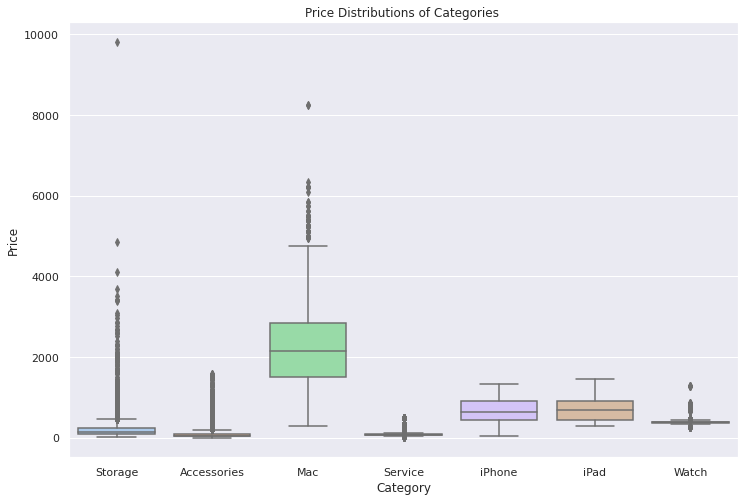

In [63]:
plt.subplots(figsize=(12, 8))

sns.boxplot(data = df, x ='category', y ='price')

plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price Distributions of Categories ')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## How many products are being discounted.

Percentage of discounted products

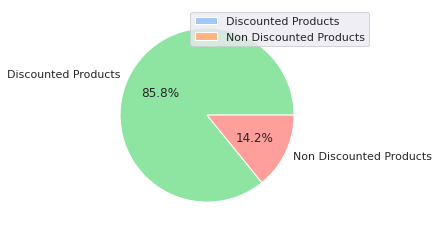

In [64]:
num_disc_pdt = len(df[df['discount'] > 0].groupby('sku'))
num_non_disc_pdt = len(df[df['discount'] <= 0].groupby('sku'))

disc_non_disc_pdt = ["Discounted Products", "Non Discounted Products"]
nums_disc_non_disc_pdt = [num_disc_pdt,num_non_disc_pdt]

plt.pie(nums_disc_non_disc_pdt)
plt.axis('equal')
plt.legend(disc_non_disc_pdt)
plt.pie(nums_disc_non_disc_pdt,
        labels=disc_non_disc_pdt,
        autopct='%0.1f%%')

plt.show()

Percentage of roducts being discounted per category

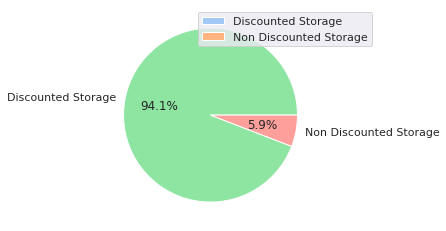

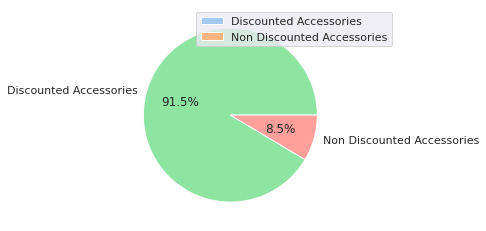

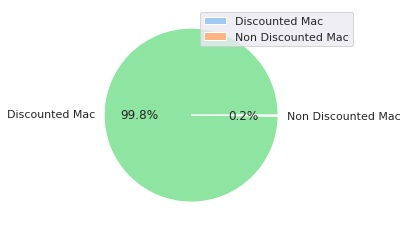

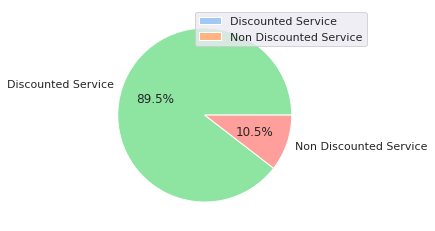

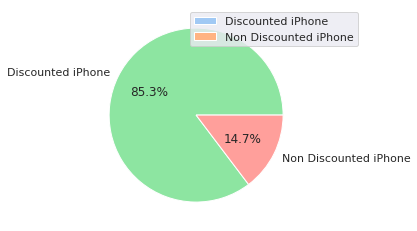

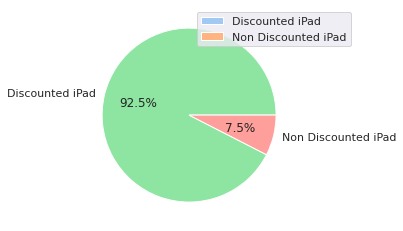

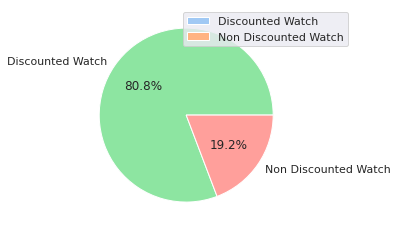

In [65]:
categories = ['Storage', 'Accessories', 'Mac', 'Service', 'iPhone', 'iPad',
       'Watch']
       
for x in categories:
  num_disc = len(df[(df['discount'] > 0 )& (df['category'] == x)])
  num_non_disc = len(df[(df['discount'] <= 0 )& (df['category'] == x)])

  disc_non_disc = ["Discounted "+ x, "Non Discounted "+ x]
  nums_disc_non_disc = [num_disc, num_non_disc]

  plt.pie(nums_disc_non_disc)
  plt.axis('equal')
  plt.legend(disc_non_disc)
  plt.pie(nums_disc_non_disc,
          labels=disc_non_disc,
          autopct='%0.1f%%')

  plt.show()

In [66]:
df.columns

Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'total_price', 'total_paid', 'state', 'name', 'desc', 'price', 'type',
       'max_price_orderlines', 'discount', 'discount_perc', 'discounts',
       'category'],
      dtype='object')

## How big are the offered discounts as a percentage of the product prices.

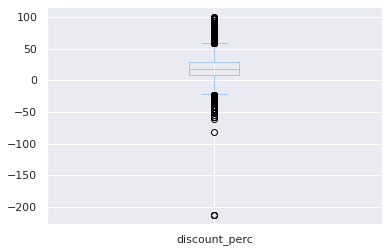

In [67]:
df['discount_perc'].plot.box()

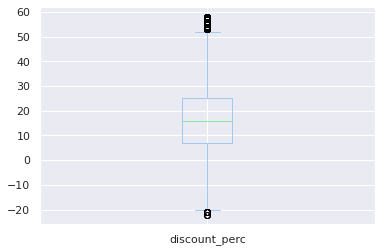

In [68]:
# Distribution of percentage discounts without ouliers

# Calculate the 25th & 75th percentiles
Q1 = df['discount_perc'].quantile(0.25)
Q3 = df['discount_perc'].quantile(0.75)
# Calculate the interquartile range
IQR = Q3-Q1
# filter the DataFrame to include only "non-outliers"
discount_perc_no_outliers = df.copy()
discount_perc_no_outliers = discount_perc_no_outliers.loc[(discount_perc_no_outliers['discount_perc']\
                                                           >= (Q1 - 1.5*IQR)) & (discount_perc_no_outliers['discount_perc'] <= (Q3 + 1.5*IQR)), :]

discount_perc_no_outliers['discount_perc'].plot.box()

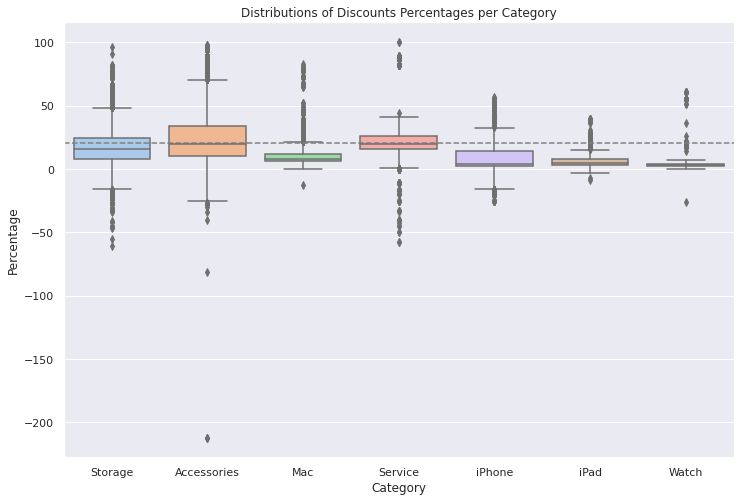

In [69]:
# Distributions of Discounts Percentages per Category
plt.subplots(figsize=(12, 8))

p = sns.boxplot(data = df, x ='category', y ='discount_perc')

p.axhline(df['discount_perc'].mean(), linestyle='--', color='gray')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Distributions of Discounts Percentages per Category')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

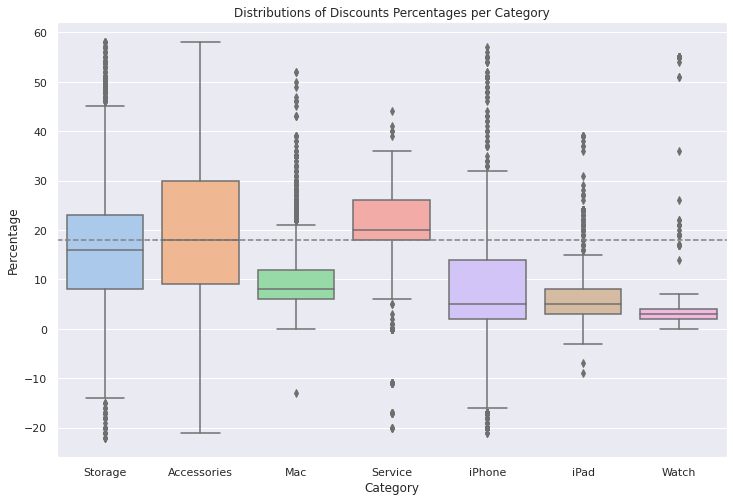

In [70]:
# Distributions of Discounts Percentages per Category without outliers

plt.subplots(figsize=(12, 8))

p = sns.boxplot(data = discount_perc_no_outliers, x ='category', y ='discount_perc')

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(discount_perc_no_outliers['discount_perc'].mean(), linestyle='--', color='gray')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Distributions of Discounts Percentages per Category')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

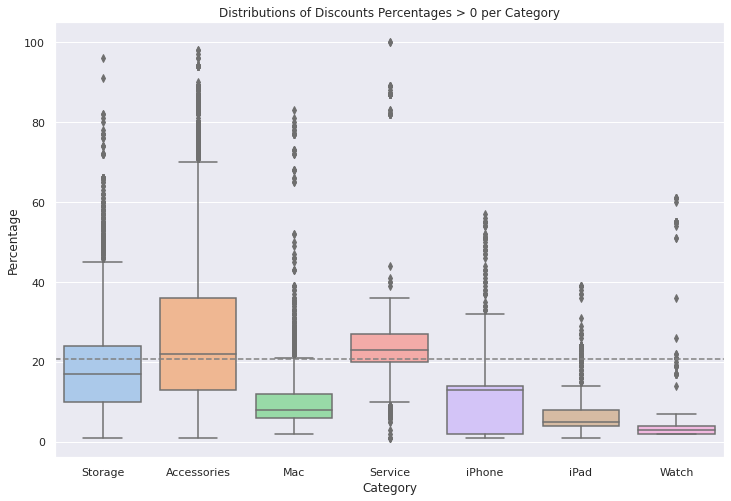

In [71]:
# Distributions of Discounts Percentages > 0 per Category

plt.subplots(figsize=(12, 8))

p = sns.boxplot(data = df[df['discount_perc'] > 0], x ='category', y ='discount_perc')

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(df['discount_perc'].mean(), linestyle='--', color='gray')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Distributions of Discounts Percentages > 0 per Category')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

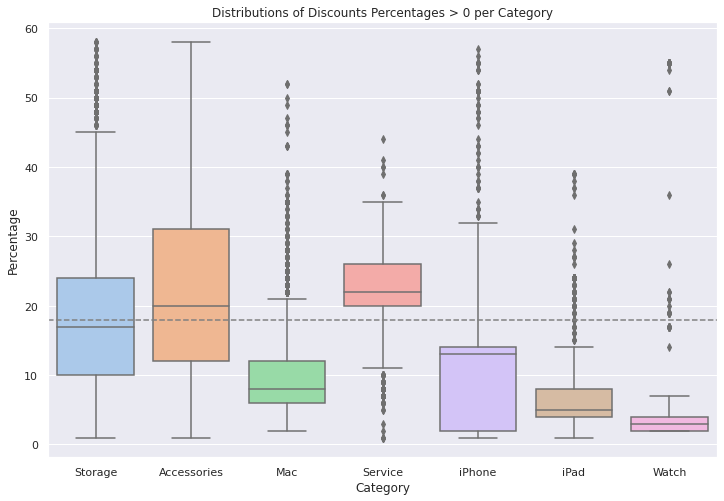

In [72]:
# Distributions of Discounts Percentages > 0 per Category and without ouliers

plt.subplots(figsize=(12, 8))

p = sns.boxplot(data = discount_perc_no_outliers[discount_perc_no_outliers['discount_perc'] > 0], x ='category', y ='discount_perc')

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(discount_perc_no_outliers['discount_perc'].mean(), linestyle='--', color='gray')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Distributions of Discounts Percentages > 0 per Category')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## How seasonality and special dates (Christmas, Black Friday) affect sales.

In [73]:
holiday_discount = df.assign(month_day = df['date'].dt.strftime('%m-%d'))\
  .groupby('month_day')\
  .agg(total_discount = ('discount', sum), revenue = ('total_price', sum))\
  .sort_values(['month_day'])\
  .reset_index()


In [82]:
holiday_discount.sort_values('revenue',ascending=False).head(10)

,month_day,total_discount,revenue
327,11-24,117470.69,723120.11
326,11-23,64079.96,419425.72
330,11-27,65271.96,382367.28
329,11-26,42762.06,221926.67
30,01-31,28528.68,209865.26
328,11-25,30646.44,179053.81
1,01-02,24226.56,172000.56
2,01-03,21076.19,152140.20
361,12-28,20148.16,148435.73
29,01-30,20048.65,145173.46


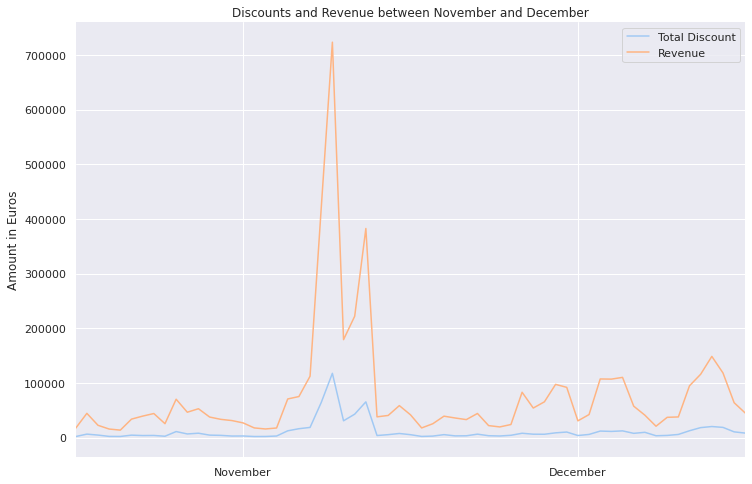

In [74]:
# define the size of the plot
# using matplotlib (plt), which operates together with seaborn

ax = plt.subplots(figsize=(12, 8))

sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, and ticks.
sns.set_palette("bright") # deep, muted, pastel, bright, dark, and colorblind

p = sns.lineplot(data=holiday_discount, x='month_day',y='total_discount')
p2 = sns.lineplot(data=holiday_discount, x='month_day',y='revenue')

p.set_xticks([319, 349])
p.set_xticklabels(['November', 'December'])

plt.xlim('11-01','12-31') # define a limit to put focus on your chart

plt.xlabel('')
plt.ylabel('Amount in Euros')
plt.title('Discounts and Revenue between November and December')

plt.legend(labels=['Total Discount', 'Revenue'])

plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# sns.despine() # remove the top and right margin, to make your plot prettier
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

Discount_perc vs revenue

In [75]:
df_discount_perc = (df
    .assign(year_month = df['date'].dt.strftime('%Y-%m'))
    .groupby('year_month')
    .agg(mean_discount_perc = ('discount_perc', np.mean), revenue = ('total_price', sum))
    .sort_values(['year_month'])
    .replace(0, np.nan)
    .reset_index()
)


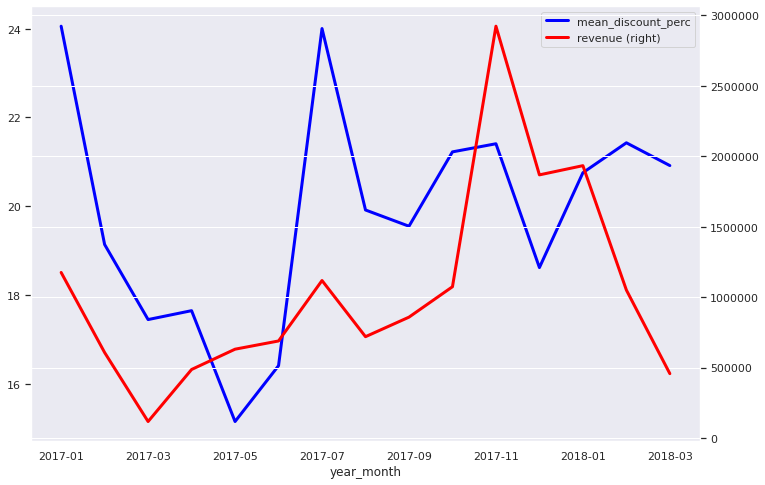

In [76]:
# discount_perc vs revenue

ax = df_discount_perc.plot(kind = 'line', x = 'year_month',
                  y = 'mean_discount_perc', color = 'Blue',
                  linewidth = 3, figsize=(12,8))
 
ax2 = df_discount_perc.plot(kind = 'line', x = 'year_month',
                   y = 'revenue', secondary_y = True,
                   color = 'Red',  linewidth = 3,
                   ax = ax)

plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
